# LetsGrowMore

TASK 1: MUSIC RECOMMENDATION

DONE BY: MEERA P V

### IMPORT LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### IMPORT DATASET

In [6]:
ntr = 7000
nts = 3000
data = pd.read_csv('train.csv',nrows =ntr)
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv('train.csv',names = names, skiprows=ntr, nrows = nts )
songs = pd.read_csv('songs.csv')
members = pd.read_csv('members.csv')

### EDA

In [8]:
data.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1


In [9]:
data.sample(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
6642,Im6u0tiyEPrXEgdaCF+CUU6Q7+dXOJESV+eh9g0zrtc=,bu5v9W/kW4mL9YyRr/R0lIUYn4Bv6OEkAFXqrBarkb8=,my library,Local playlist more,local-playlist,0
2170,pHecJVO4wWLFElV2D36iA/bkuvrAnXf7EM+xCwEMee0=,LSpS3oOWpB77iSuzAnfLH3faJ0jYtNAK4zLZDGf+o00=,my library,Local playlist more,local-library,1
4820,gaYdxoXSGQvFL9Uqb6QB7uPxyS/ITYM/TO7nbZd+8nI=,hiDfgU5innLt49ANwv3kqOcT5ua/Bw0/2vtMUButnCk=,my library,Local playlist more,local-library,1
3716,Qi5ZjETGV2CmNsrMWyqmdZ6ECGkDmAUkv8xWYfn5y6U=,gxzvL74hYqlvPuuu4Hl0nqdyNkEMLLclrnFKuYJM3lY=,my library,Local playlist more,local-library,0
3971,1CYW5BhjKS3e4EBwKpk1m0Na6auxYPMU8ZQlPS5xg4Y=,HzCFc9gU/AuYNF1ld1ZlyeCpQvVLTonc8+ZrUAidmmY=,my library,Local playlist more,local-playlist,1
4205,uKg9h4w3vN3A473AXKNVS4lP9LoxdQmE6aPlcdmtDEc=,nLfhFoHckdMgyokbjzEYKpp5NWT4KFzdTBYC14Mxn5A=,my library,Local playlist more,local-library,1
2064,xOYfEnlbSceZPxSFui3yz91tAospqh+DrSS18Ix4GPE=,klO0dwb/hic9DrqdWwlJpW8PK6ypqk5WnavRPKTPaqk=,my library,Local playlist more,local-playlist,1
4792,/Fc3ie2wEpNMw2PWmVhZ7Olh6tE5KMYburGooIpXY/Q=,MAFu+wptUSOgg66FS+jP7Nb72bKfx2BFCcCRhMlV6dQ=,my library,Local playlist more,local-library,1
223,BT9T8dvM4k3Xx2UZd5m+GwUnhOR5+5Q4XPbpOR5rj8o=,E9e7rcarCZI590squoGDSVS1QfJxz9FiX6bTDdlEHDU=,discover,Online playlist more,online-playlist,0
2574,V5U4EGk2kaSKaUGSwhU6g3HBefxflEvAy1vWPu6UBQs=,SEXmGAIKrBLJvU2yqL7G0KUkKq81WgLwrzy/GHyPjYE=,my library,Local playlist more,local-library,1


In [10]:
data.shape

(7000, 6)

In [11]:
data.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [12]:
data.describe()

,target
count,7000.000000
mean,0.783429
std,0.411937
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                7000 non-null   object
 1   song_id             7000 non-null   object
 2   source_system_tab   6986 non-null   object
 3   source_screen_name  6815 non-null   object
 4   source_type         6986 non-null   object
 5   target              7000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 328.2+ KB


In [14]:
data.isnull().sum()

msno                    0
song_id                 0
source_system_tab      14
source_screen_name    185
source_type            14
target                  0
dtype: int64

##### SONGS DATASET

In [15]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [16]:
songs.sample(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
1230816,Z6bSbimHaKowHF1byIrSc1qSFJcWd3C7L+Iiob6XiuQ=,408114,1259,Lil Jon & The East Side Boyz,NaN,NaN,52.0
864961,2Haskg6jiCDImKqSBpo7qkVMBqnlRrkK0Z0wOHj/nnM=,315088,NaN,De-Va'Je,Devaje Mathis Entertainment Group,De-Va'Je J-Von Mathis,52.0
855216,crfyuxZGLIwBySKuQIdTVw2rumX+iyQyGvGiH/BkBCo=,273763,465,忠於自己,NaN,NaN,3.0
356727,SLicVL6A/+kBCyMz76DnI59OUGuIg/1HTdLU+VLAMlQ=,221240,921,David Arnold,NaN,NaN,52.0
969402,6kJWQ6AgeoexcsV2fmdVPZCzvTzRy3iEPLT9v0+uYTU=,211487,531,Bo Burnham,NaN,NaN,-1.0
208420,u5i3LJjEbyl04eicyirQwFgGQhWryVmom2ZC26u/O4Q=,207412,940,The Big 鋼琴,Neuromancer,NaN,-1.0
2077505,+IFnGW4frakfUGoDr1AtS1Sr+R1+x4FYTRFWv26Y5tY=,149577,798,Doris Day,Huddleston/Rinker/Gleason,NaN,52.0
810629,+3NzeABxt+D8e2piPmzKf06E4sdFx8CEMUOhpfLmRtg=,175357,139,B.B. King,Riley B. King,NaN,52.0
817127,vuTPmjxzwmGzwujvHLJLBkgb6KgCa8quyCtPKrPEfHI=,198765,958,David Aaron Carpenter,Antonio Vivaldi,NaN,-1.0
1345009,HLS7Q9MVCGx/K7rC2NsxIwAfysowZukToHeQX0vJxD4=,331209,786,Jascha Heifetz,NaN,NaN,52.0


In [17]:
songs.shape

(2296320, 7)

In [18]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [19]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [20]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [21]:
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

##### Members datasets

In [22]:
members.head(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,20160130,20170930
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,20110111,20170930
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,20160217,20170613


In [23]:
members.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
15603,TLvcAkEZk1EcYx9FCVJdVSl6d5qvfEhy4lpoNLvJocc=,1,0,NaN,7,20151202,20171002
27214,zo5c82d81OthDFkzIQbo9IYrSSBOBo4tLntAmYVHZ2w=,1,0,NaN,4,20161204,20161207
17282,chjo8yNa22fvev9YXMb2OVdO5L+OpXHw7u6v8DyrM9A=,1,0,NaN,4,20170110,20170113
5875,m9VNkR6x8XYe78Fn73UpzlJGWcgwDs6upnWrWebCCd8=,9,25,female,4,20151109,20180916
32052,1n93Zud4GtFoaR9V/nG8IMgymS56mAW1sqvRAgn2D9w=,15,22,male,9,20070408,20150615
18827,QHkjWJt3Rk/oaJdPhWcf329KuwUaB8RyglGi0b7SImU=,1,0,NaN,7,20130623,20161231
28852,KN7xDW1WYefdpxV7obIGoXfS5JQ9CTTXSF75KMEukIA=,5,0,female,9,20041005,20170915
4777,YkeCU3BTpdMuL/MpH5V/Gl8C83J6/7dTEwBrG3bR6uk=,4,18,female,9,20151003,20171005
20960,cGT8zs/Z7C5A71UkwmnpQRUJwOMOvmKeg+61T6ow84c=,1,0,NaN,4,20160109,20160112
17158,C3lyenUNDt5Plcsd62JnbqrGnBhNLoZkQzwHn+McwdU=,4,0,NaN,3,20131012,20171220


In [24]:
members.shape

(34403, 7)

In [25]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [26]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [27]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [28]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

### DATA VISUALIZATION

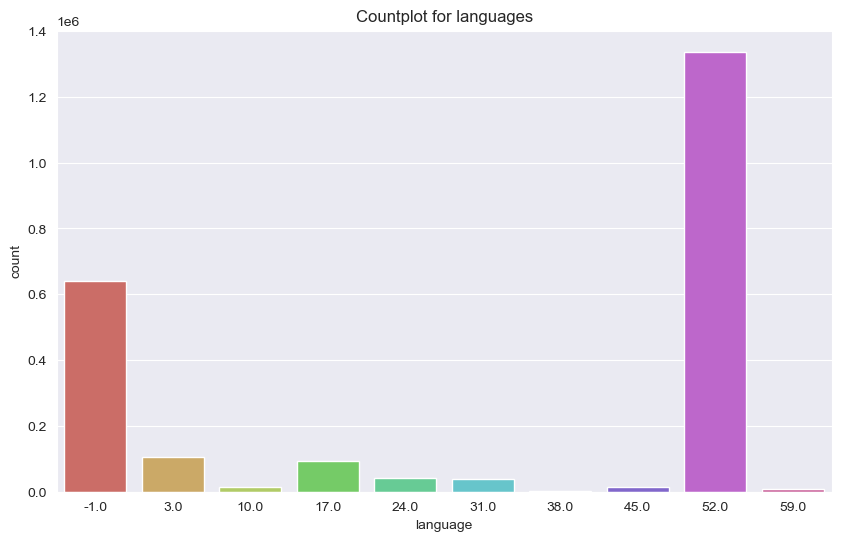

In [107]:
plt.figure(figsize = (10, 6))
sns.set_style("darkgrid")
ax = sns.countplot(x = songs.language, data = songs.language,palette="hls",)
ax.set_title("Countplot for languages")
plt.show()

Text(0.5, 1.0, 'Count plot for gender')

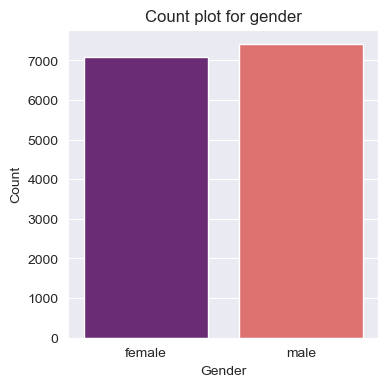

In [108]:
plt.figure(figsize=(4,4))
sns.countplot(x='gender', data=members, palette = 'magma')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count plot for gender')

Text(0.5, 1.0, 'Count plot for Registation Method')

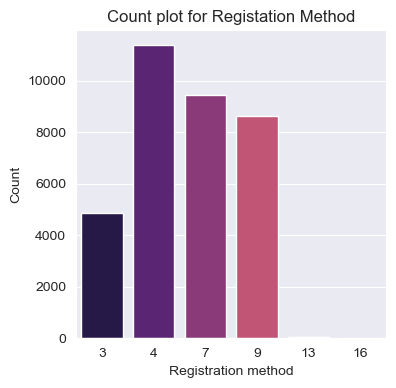

In [109]:
plt.figure(figsize=(4,4))
sns.countplot(x='registered_via', data=members, palette = 'magma')
plt.xlabel('Registration method')
plt.ylabel('Count')
plt.title('Count plot for Registation Method')

Text(0.5, 1.0, 'Count plot for system tab there are using')

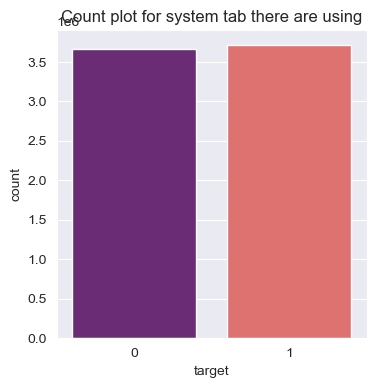

In [110]:
plt.figure(figsize=(4,4))
sns.countplot(x='target',data = train, palette = 'magma')
plt.xlabel('target')
plt.ylabel('count')
plt.title('Count plot for system tab there are using')

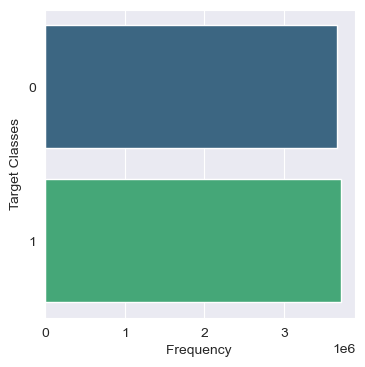

In [111]:
plt.figure(figsize=(4,4))
sns.countplot(y=train['target'],data=train, palette = 'viridis')
plt.ylabel('Target Classes')
plt.xlabel('Frequency ')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'explore'),
  Text(1, 0, 'my library'),
  Text(2, 0, 'search'),
  Text(3, 0, 'discover'),
  Text(4, 0, 'radio'),
  Text(5, 0, 'listen with'),
  Text(6, 0, 'notification'),
  Text(7, 0, 'settings')])

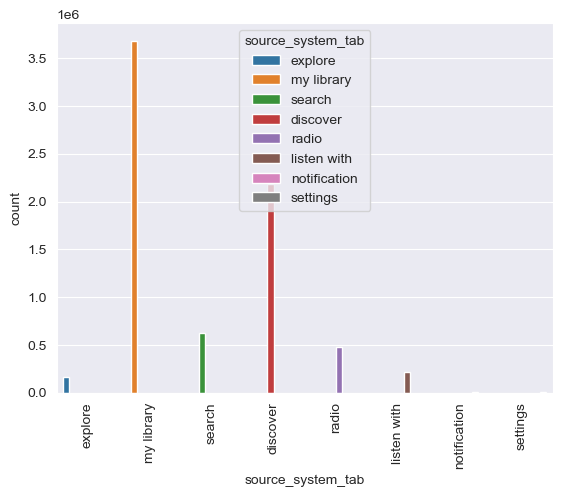

In [112]:
sns.countplot(x = train['source_system_tab'],hue=train['source_system_tab'])
plt.xticks(rotation =90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'explore'),
  Text(1, 0, 'my library'),
  Text(2, 0, 'search'),
  Text(3, 0, 'discover'),
  Text(4, 0, 'radio'),
  Text(5, 0, 'listen with'),
  Text(6, 0, 'notification'),
  Text(7, 0, 'settings')])

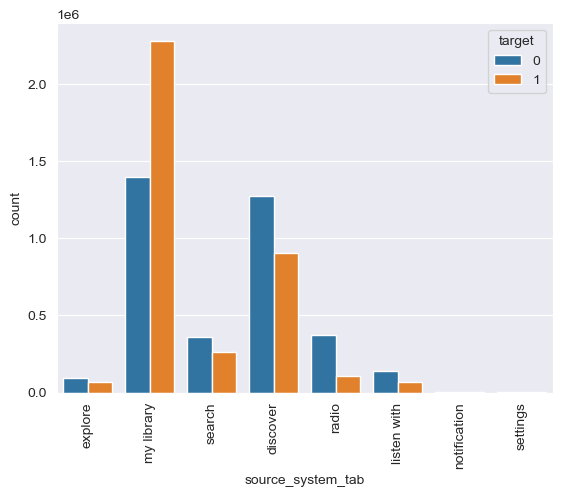

In [113]:
sns.countplot(x = train['source_system_tab'],hue=train['target'])
plt.xticks(rotation =90)

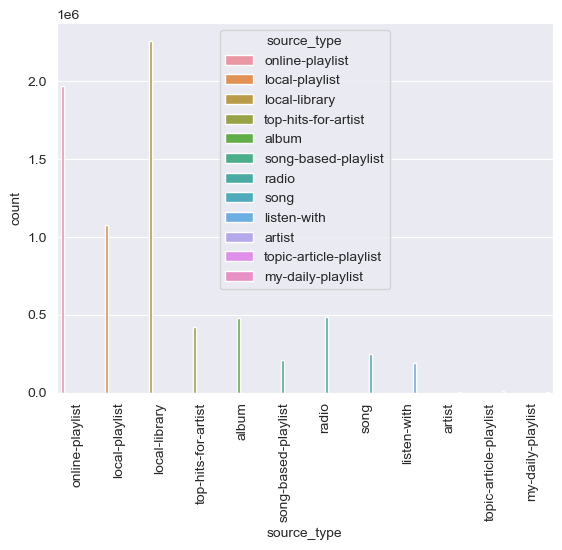

In [114]:
sns.countplot(x = train['source_type'],hue=train['source_type'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

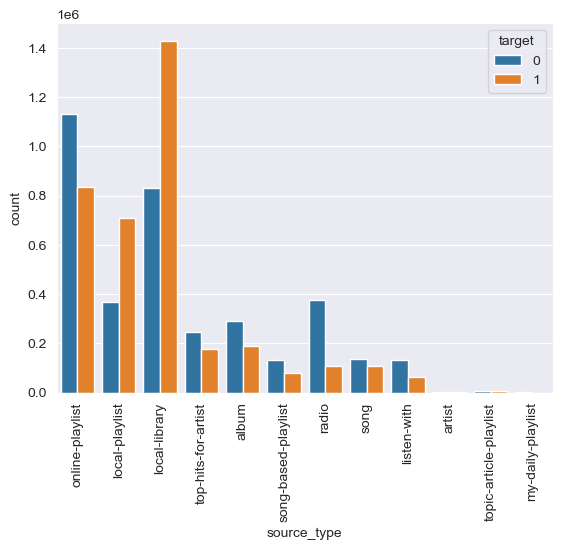

In [115]:
sns.countplot(x = train['source_type'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

### PRE-PROCESSING

In [29]:
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [30]:
test_name = ['id','msno','song_id','source_system_tab',
             'source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [31]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = data.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [32]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [33]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [34]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [35]:
train = train.fillna(-1)
test = test.fillna(-1)

In [36]:
import gc
del members, songs; gc.collect();

In [37]:
colm = list(train.columns)
colm.remove('target')

In [38]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(colm):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|█████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 101.66it/s]


In [39]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})

train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

#### MODEL BUILDING

In [40]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                    test_size=0.1, random_state = 12)
    
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]

##### TRYING BASIC CLASSIFICATION MODELS

In [41]:
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    #accuracy_score = m1_model.metrics.accuracy_score(y_valid,y_pred)
    #print('Accuracy Score : {}'.format(accuracy_score))
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

In [42]:
from sklearn.linear_model import LogisticRegression
predict(LogisticRegression())

Training Score : 0.783968253968254
Accuracy on test data for the model 74.9


In [43]:
from sklearn.ensemble import RandomForestClassifier
predict(RandomForestClassifier())

Training Score : 1.0
Accuracy on test data for the model 79.5


In [44]:
from sklearn.neighbors import KNeighborsClassifier
predict(KNeighborsClassifier())

Training Score : 0.8076190476190476
Accuracy on test data for the model 72.03333333333333


In [45]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
predict(DecisionTreeClassifier())

Training Score : 1.0
Accuracy on test data for the model 73.96666666666667


#### Prediction using lightgbm

In [46]:
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, \
early_stopping_rounds=10, verbose_eval=10)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

C:\Users\meera\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\meera\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


In [47]:
p_test = model1.predict(X_test)

#### Printing the accuracy of lgbm model on test data

In [48]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 78.566667%


### RESULT

This brings us to a conclusion that RandomForest and LGM perform very well in test data. But RandomForest in some cases tend to overfit the data. So LigthGBM is better at predicting the music the user needs. It provides the users 78.5% accuracy on global data, basically it generalizes very well.